# Assignment 1- Time Series Forecasting 

## Author - Harshita Mehta

**Problem Statement:** Predict the temperature column ‘ _tempm’ for Delhi, using Time Series Forecasting.

In [61]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
# loading the dataset

df = pd.read_csv('Weather_data.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [65]:
# checking the dimensions of dataset
df.shape

(98913, 20)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  98913 non-null  object 
 1    _conds       98845 non-null  object 
 2    _dewptm      98294 non-null  float64
 3    _fog         98913 non-null  int64  
 4    _hail        98913 non-null  int64  
 5    _heatindexm  29111 non-null  float64
 6    _hum         98160 non-null  float64
 7    _precipm     0 non-null      float64
 8    _pressurem   98682 non-null  float64
 9    _rain        98913 non-null  int64  
 10   _snow        98913 non-null  int64  
 11   _tempm       98244 non-null  float64
 12   _thunder     98913 non-null  int64  
 13   _tornado     98913 non-null  int64  
 14   _vism        94497 non-null  float64
 15   _wdird       84533 non-null  float64
 16   _wdire       84533 non-null  object 
 17   _wgustm      1063 non-null   float64
 18   _windchillm  573 non-null

**Observation**

From above information, we can say that most of the columns contain null values. 

The data types in this dataset are float, integer and object.

The memory usage is more than 15.1 MB.

In [67]:
# checking null values

df.isnull().sum()

datetime_utc        0
 _conds            68
 _dewptm          619
 _fog               0
 _hail              0
 _heatindexm    69802
 _hum             753
 _precipm       98913
 _pressurem       231
 _rain              0
 _snow              0
 _tempm           669
 _thunder           0
 _tornado           0
 _vism           4416
 _wdird         14380
 _wdire         14380
 _wgustm        97850
 _windchillm    98340
 _wspdm          2353
dtype: int64

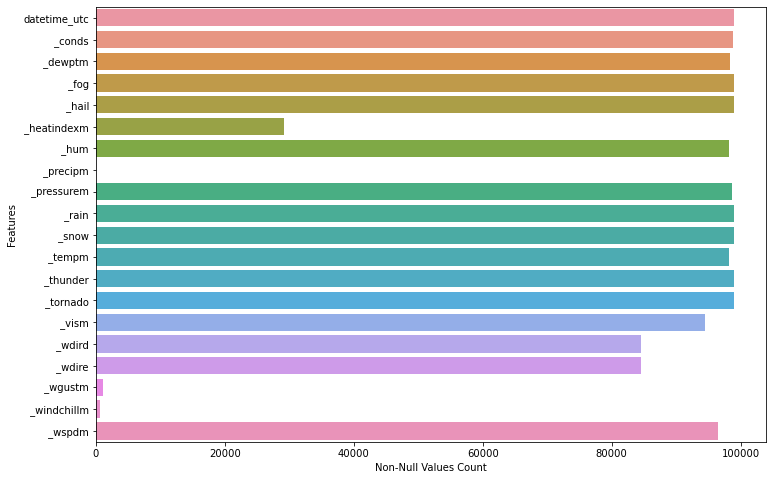

In [68]:
# checking non-null value counts

plt.figure(figsize = (12,8))
sns.barplot(x = df.count()[:], y = df.count().index)
plt.xlabel('Non-Null Values Count')
plt.ylabel('Features')
plt.show()

**Observation**

From above, we can observe that most of the columns contain null values. In Columns such as ' _heatindexm', '_precipm', '_wgustm' and '_windchillm', more than 90% of the data is null. Since, these columns contain no useful information so we will remove these columns from the dataset.

In [69]:
df.drop([' _heatindexm',' _precipm',' _wgustm',' _windchillm'], axis=1, inplace =True)

In [70]:
df.shape

(98913, 16)

In [71]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail', ' _hum',
       ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado',
       ' _vism', ' _wdird', ' _wdire', ' _wspdm'],
      dtype='object')

In [72]:
# The data time column is not in the required format. So, converting the date time columns to format(yyyy-mm-dd HH:MM). 
# Also, we will make this column as index.

from datetime import datetime

df['datetime_utc'] = pd.to_datetime(df['datetime_utc'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
df['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [73]:
df = df.set_index('datetime_utc')

In [74]:
df.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


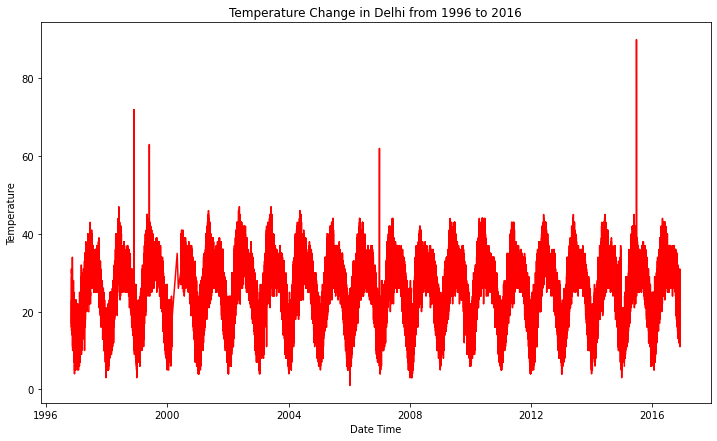

In [75]:
# plotting the temperature changes

plt.figure(figsize = (12,7))
plt.plot(df[' _tempm'], color ='red')
plt.xlabel('Date Time')
plt.ylabel('Temperature')
plt.title('Temperature Change in Delhi from 1996 to 2016')
plt.show()

**Observation**

From above graph, we can observe that this time series contain seasonal pattern. Also, it has some discontinuity from year 2000-2001 due to the presence of null values. Since, we have large data so we can use data from 2002-2016 for forecasting. We can also observe some outliers in the time series.

In [76]:
# dropping the data before 2002

df = df['2002':]

In [77]:
df.shape

(67449, 15)

In [78]:
# using forwardfill method to fill the null values

df.ffill(inplace=True)
df[df.isnull()].count()

 _conds        0
 _dewptm       0
 _fog          0
 _hail         0
 _hum          0
 _pressurem    0
 _rain         0
 _snow         0
 _tempm        0
 _thunder      0
 _tornado      0
 _vism         0
 _wdird        0
 _wdire        0
 _wspdm        0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67449 entries, 2002-01-01 00:30:00 to 2016-11-30 21:00:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    _conds      67449 non-null  object 
 1    _dewptm     67449 non-null  float64
 2    _fog        67449 non-null  int64  
 3    _hail       67449 non-null  int64  
 4    _hum        67449 non-null  float64
 5    _pressurem  67449 non-null  float64
 6    _rain       67449 non-null  int64  
 7    _snow       67449 non-null  int64  
 8    _tempm      67449 non-null  float64
 9    _thunder    67449 non-null  int64  
 10   _tornado    67449 non-null  int64  
 11   _vism       67441 non-null  float64
 12   _wdird      67449 non-null  float64
 13   _wdire      67449 non-null  object 
 14   _wspdm      67446 non-null  float64
dtypes: float64(7), int64(6), object(2)
memory usage: 8.2+ MB


In [80]:
df.describe()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm
count,67449.000000,67449.000000,67449.000000,67449.000000,67449.000000,67449.000000,67449.000000,67449.000000,67449.000000,67449.000000,67441.000000,67449.000000,67446.000000
mean,16.093152,0.064434,0.000178,56.993907,967.083761,0.028510,0.000015,25.862933,0.009578,0.000015,2.287757,183.208142,7.416710
std,6.998362,0.245526,0.013337,24.270784,796.645488,0.166427,0.003850,8.511908,0.097396,0.003850,24.805425,117.688750,10.847427
min,-21.000000,0.000000,0.000000,4.000000,-9999.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,37.000000,1001.000000,0.000000,0.000000,20.000000,0.000000,0.000000,1.500000,80.000000,0.000000
50%,16.000000,0.000000,0.000000,58.000000,1008.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.000000,220.000000,5.600000
75%,23.000000,0.000000,0.000000,78.000000,1014.000000,0.000000,0.000000,32.000000,0.000000,0.000000,2.800000,290.000000,11.100000
max,75.000000,1.000000,1.000000,243.000000,101014.000000,1.000000,1.000000,90.000000,1.000000,1.000000,6436.000000,960.000000,1492.700000


**Observation**

We can observe that the maximum temperature is 90 degree Celsius and minimum is 1 degree Celsius. Also, the maximum humidity is 243 and minimum 4.
Here, 90 degree temperature with 243 % humidity is unrealistic. Hence, it is an outlier.

## Visualization 

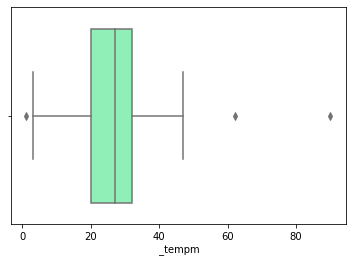

In [81]:
# using boxplot to visualize outliers

sns.boxplot(x = df[' _tempm'], data = df, palette = 'rainbow')
plt.show()

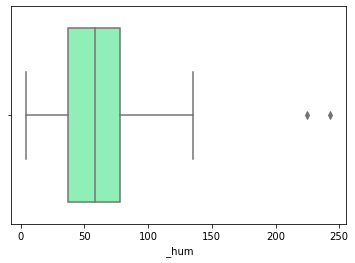

In [82]:
sns.boxplot(x = df[' _hum'], data = df, palette = 'rainbow')
plt.show()

**Observation**

From the above boxplot, we can observe the outliers in temperature and humidity column. Now, we will treat the outliers.

In [83]:
df = df[df[' _tempm'] < 50]
df = df[df[' _hum'] <150]

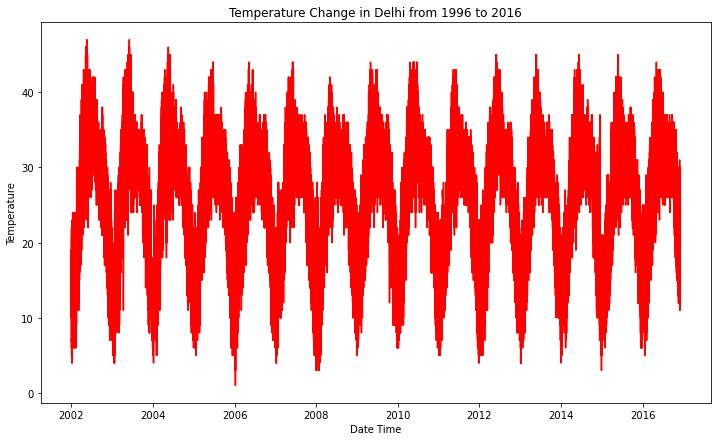

In [84]:
# plotting the temperature changes

plt.figure(figsize = (12,7))
plt.plot(df[' _tempm'], color ='red')
plt.xlabel('Date Time')
plt.ylabel('Temperature')
plt.title('Temperature Change in Delhi from 1996 to 2016')
plt.show()

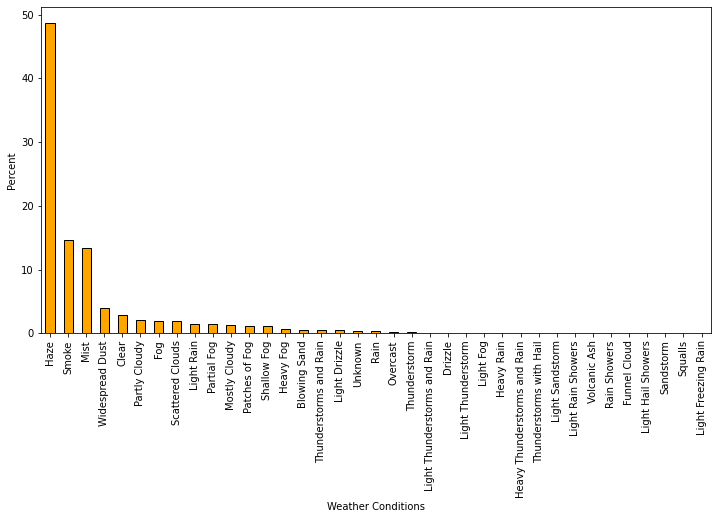

In [85]:
# visualizing weather condition in Delhi.

weather_condition = (df[' _conds'].value_counts()/(df[' _conds'].value_counts().sum()))*100
weather_condition.plot.bar(figsize=(12,6), edgecolor = "black", color = "orange")
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')
plt.show()

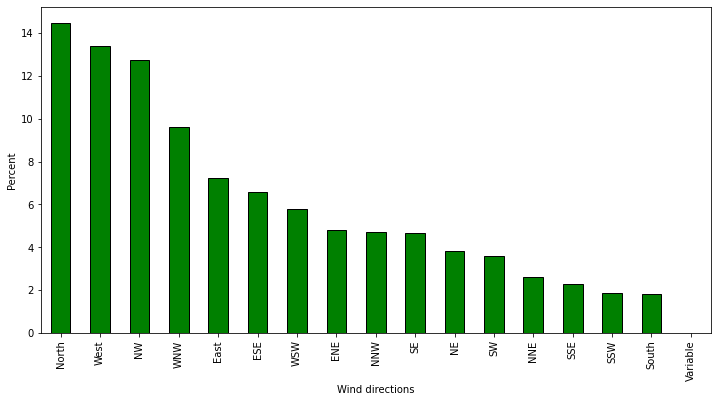

In [86]:
# visualizing wind directions

wind_direction = (df[' _wdire'].value_counts()/(df[' _wdire'].value_counts().sum()))*100
wind_direction.plot.bar(figsize=(12,6), edgecolor = "black", color = "green")
plt.xlabel('Wind directions')
plt.ylabel('Percent')
plt.show()

**Observation**

We can observe that the weather condition is not good in Delhi. The weather is mostly hazy and smoky which means the city has pollution problems. From the second plot it is understood that, mostly the wind blows towards North. 

In [87]:
# dropping all columns except temperature for prediction

new_df = df[[' _tempm']]

In [88]:
new_df.head()

,_tempm
datetime_utc,
2002-01-01 00:30:00,7.0
2002-01-01 01:30:00,7.0
2002-01-01 02:30:00,8.0
2002-01-01 03:30:00,10.0
2002-01-01 04:30:00,10.0


In [89]:
new_df.shape

(67445, 1)

In [90]:
train = new_df[:'2014']
test =  new_df['2015':]

## Decompose the data

I have used statsmodel package to decompose the data to view more of complexity behind the linear visualization. Here, the time series is deconstructed into four different components:  Observed, Trended, Seasonal and Residual.

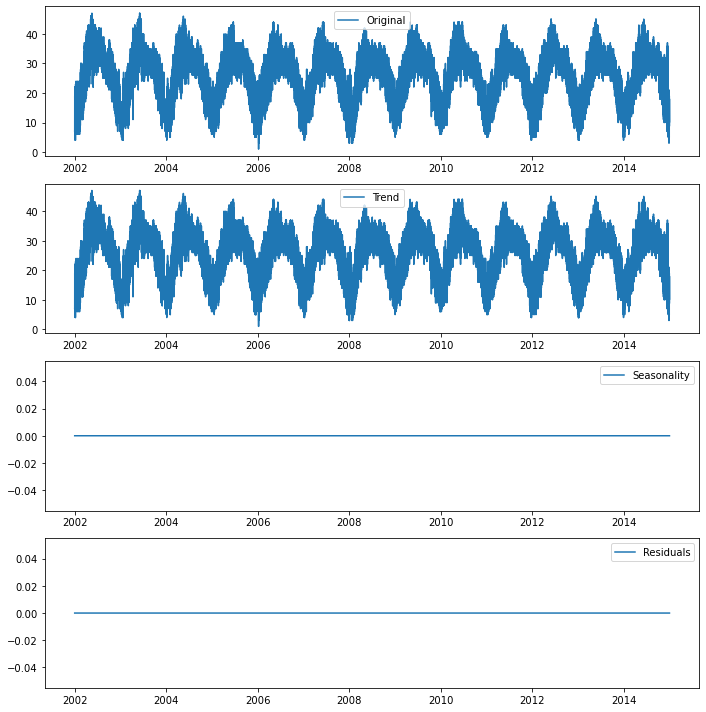

In [91]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = sm.tsa.seasonal_decompose((train), model = 'additive', period =1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(train[' _tempm'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

We can observe that this time series have yearly periodic patterns

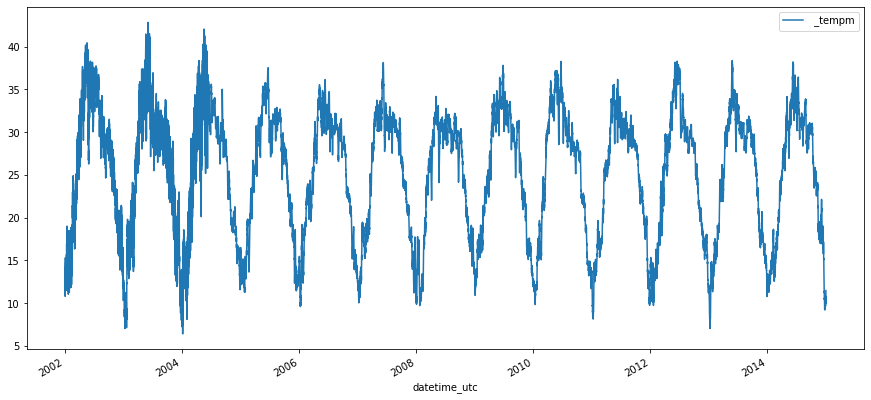

In [94]:
# using moving average smoothing to remove noise and reveal underlying trends.

df_mean = train.rolling(window = 30).mean()
df_mean.plot(figsize = (15,7))
plt.show()

## Checking Stationarity

To check stationarity, I have used the Augmented Dickey-Fuller(ADF) test.

In [95]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF:", dftest[0])
    print("2. p-value:", dftest[1])
    print("3. Number of lags:", dftest[2])
    print("4. Number of observations:", dftest[3])
    print("5. Critical Value:")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)
        
adfuller_test(train)       

1. ADF: -5.491819213106602
2. p-value: 2.1667179461423346e-06
3. Number of lags: 58
4. Number of observations: 58475
5. Critical Value:
	 1% : -3.4304618356064314
	 5% : -2.8615894291991233
	 10% : -2.56679630950043


**Observation:**
    
Looking at the above ADF test, we can say that our data is non-stationary.   

## Making the data Stationary

There are many approaches to stationarize data, here I have used differencing.

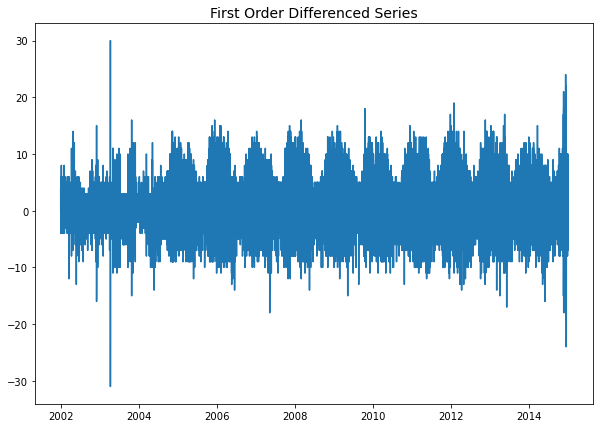

In [96]:
# differencing

train[' _tempm_diff'] = train[' _tempm'].diff()


plt.figure(figsize=(10, 7))
plt.plot(train[' _tempm_diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.show()

In [97]:
adfuller_test(train[' _tempm_diff'].dropna())       

1. ADF: -38.415356902932615
2. p-value: 0.0
3. Number of lags: 57
4. Number of observations: 58475
5. Critical Value:
	 1% : -3.4304618356064314
	 5% : -2.8615894291991233
	 10% : -2.56679630950043


**Observation:**
    
From above, we can observe that the p-value is less than 0.05. So, we reject the null hypothesis and conclude that the time series is stationary. 

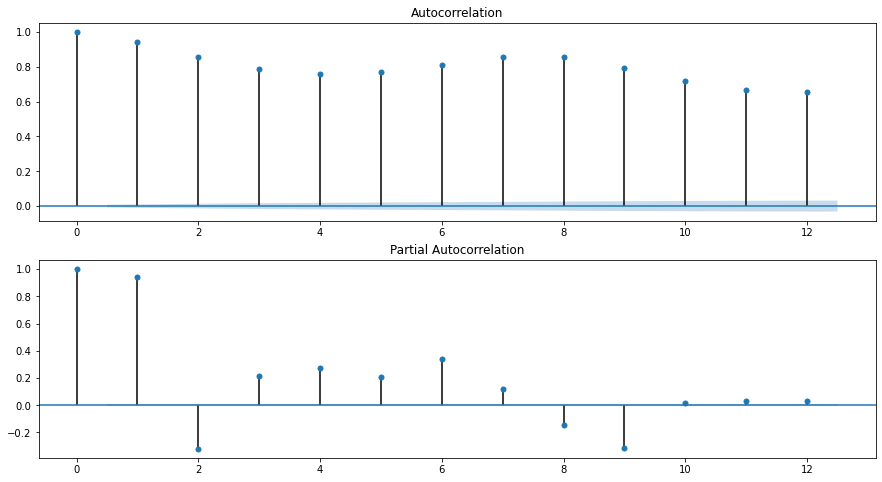

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize =(15,8))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(train[' _tempm'].dropna(), lags =12, ax = ax1)

ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(train[' _tempm'].dropna(), lags =12, ax = ax2)
plt.show()

In [99]:
# Resampling the data to mothly and averaging out the temperature to predict the monthly average temperature

train_df = train[' _tempm'].resample('M').mean()
test_df = test[' _tempm'].resample('M').mean()

## Building SARIMA Model

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

nonseasonal_order = (1,1,2)
seasonal_order = (1,1,2,12)
model = SARIMAX(train_df , order= nonseasonal_order,seasonal_order= seasonal_order)
result = model.fit()              

In [101]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             _tempm   No. Observations:                  156
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -237.648
Date:                            Wed, 02 Mar 2022   AIC                            489.296
Time:                                    04:31:25   BIC                            510.036
Sample:                                01-31-2002   HQIC                           497.724
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2917      0.362      0.806      0.420      -0.418       1.001
ma.L1         -0.9612      0.374     -2.570      0.010      -1.694      -0.228
ma.L2          0.0097      0.332      0.029      0.977      -0.642       0.661
ar.S.L12      -0.4164      0.863     -0.482      0.630      -2.109       1.276
ma.S.L12      -0.6638      2.274     -0.292      0.770      -5.121       3.794
ma.S.L24      -0.3260      1.555     -0.210      0.834      -3.374       2.722
sigma2         1.2778      3.256      0.392      0.695      -5.103       7.659
===================================================================================
Ljung-Box (Q):                       37.52   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.58   Prob(JB):                         0.73
Heteroskedasticity (H):               0.61   Skew:                            -0.02
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
# Mean Absolute Error for training data

print(np.mean(np.abs(result.resid)))

1.3592460721956372


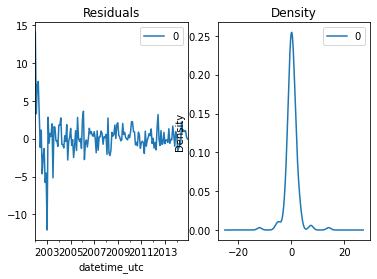

In [103]:
# Plotting residual errors

residuals = pd.DataFrame(result.resid)

fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Time Series Forecasting


In [104]:
forecast_values = result.get_forecast(steps =len(test_df))
forecast_ci = forecast_values.conf_int()


In [105]:
predicted = forecast_values.predicted_mean
predicted

2015-01-31    12.681661
2015-02-28    17.187743
2015-03-31    23.336916
2015-04-30    29.558059
2015-05-31    32.834686
2015-06-30    32.944484
2015-07-31    30.968845
2015-08-31    29.660776
2015-09-30    28.555102
2015-10-31    25.159132
2015-11-30    19.354731
2015-12-31    14.597818
2016-01-31    12.653724
2016-02-29    16.903857
2016-03-31    23.038657
2016-04-30    29.297867
2016-05-31    32.543804
2016-06-30    33.122146
2016-07-31    31.042891
2016-08-31    29.725163
2016-09-30    28.545506
2016-10-31    25.173283
2016-11-30    19.349372
Freq: M, dtype: float64

In [106]:
forecast_ci.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', freq='M')

In [107]:
forecast1 = result.get_forecast(steps=len(test_df))
predictedmean = forecast1.predicted_mean

bound = forecast1.conf_int()

lower_limit = bound.iloc[:,0]
upper_limit = bound.iloc[:,1]

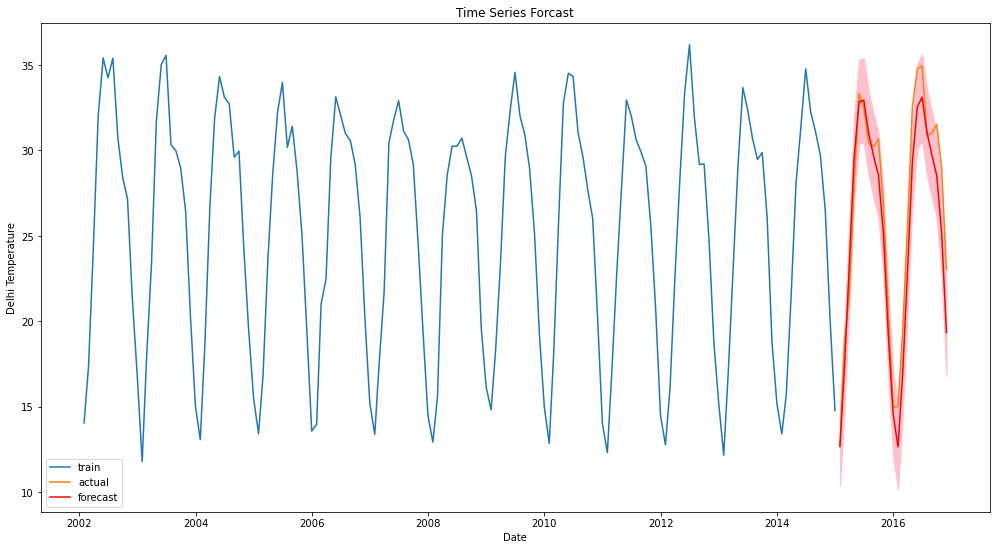

In [108]:
# visualizing

plt.figure(figsize=(17,9))

plt.plot(train_df.index, train_df, label='train')
plt.plot(test_df.index, test_df, label='actual')

plt.plot(predictedmean.index, predictedmean, color= 'red', label='forecast')

plt.fill_between(bound.index,lower_limit,upper_limit, color='pink')

plt.title('Time Series Forcast')
plt.xlabel('Date')
plt.ylabel('Delhi Temperature')
plt.legend()
plt.show()

In [113]:
submission = pd.DataFrame({ 'DateTime': test_df.index, 'Temperature': predicted })
submission.to_csv("submission_TS.csv", index= False)

**Note:**
    
We can also perform time series forcasting using deep learning techniques. Deep networks have a better ability to represent high level features from the input, therefore giving more accurate predictions. RNN and LSTM are most popular deep learning techniques that can be used for time series forecasting.
    